<a href="https://www.kaggle.com/code/hikmatullahmohammadi/ds-job-salaries-analysis-eda?scriptVersionId=108298164" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1 id='title' style='background: darkblue;color: white;text-align: center; padding: 20px'>
Data Science Salaries Analysis (EDA)</h1>

![Data Science](https://raw.githubusercontent.com/hikmatullah-mohammadi/ds-job-salaries-analysis-eda/master/what-is-data-science.jpg)

<div id='what-is-data-science'>
<b>What is Data Science?</b> 
</div>

<p>
<dfn><b>Data Science</b></dfn> is, in its essence, the science of drawing insights from data, and then using them so as to address real world problems. Today, data science is every where, ranging from your automatic refrigerator to NASA spaceships.</p>

---
Some of Data Sience <b>Job Titles</b> are as follows:<br>
- Data Scientist
- Data Engineer
- Data Analyst
- Machine Learning Engineer
- Research Scientist
- Data Science Manager
- Data Architect
- Machine Learning Scientist
- Big Data Engineer
- Principal Data Scientist
- Director of Data Science
- AI Scientist
- Data Analytics Manager
- Data Science Consultant
- BI Data Analyst
- Computer Vision Engineer
- ML Engineer
- Lead Data Engineer
- Business Data Analyst
- Applied Data Scientist
- Data Engineering Manager
- Head of Data
- Head of Data Science
- Analytics Engineer
- Applied Machine Learning Scientist
- Data Analytics Engineer
- Machine Learning Developer
- Principal Data Engineer
- Machine Learning Infrastructure Engineer
- Computer Vision Software Engineer
- Data Science Engineer
- Lead Data Scientist
- Lead Data Analyst
- Principal Data Analyst
- Cloud Data Engineer
- Director of Data Engineering
- Product Data Analyst
- Financial Data Analyst
- ETL Developer
- Finance Data Analyst
- NLP Engineer
- 3D Computer Vision Researcher
- Marketing Data Analyst
- Machine Learning Manager
- Head of Machine Learning
- Data Specialist
- Data Analytics Lead
- Big Data Architect
- Lead Machine Learning Engineer
- Staff Data Scientist
---

In [1]:
# import requried libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# get the dataset
df = pd.read_csv('../input/data-science-job-salaries/ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


<h2 id='data-preprocessing' style='background: darkblue;color: white;text-align: center; padding: 15px'>
1- Data Preprocessing</h2>

In [3]:
# remove the 'Unnamed: 0 ' column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
# shape
df.shape

(607, 11)

The dataset is comprised of 607 instances and 11 variables

---

In [5]:
# columns and data types
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

---

<span id='change-abbr-to-complete'><b>Change abbreviations to complete values</b></span><br>
The categorical variables contains some abbreviated values; to better understand, let's change them to their original names.

In [6]:
# experience level
df['experience_level'].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [7]:
df['experience_level'] = df['experience_level'].map({
    'SE': 'Senior',
    'MI': 'Mid',
    'EN': 'Entry',
    'EX': 'Executive'
})

In [8]:
# employment type
df['employment_type'].value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

In [9]:
df['employment_type'] = df['employment_type'].map({
    'FT': 'Full-time',
    'PT': 'Part-time',
    'CT': 'Contract',
    'FL': 'Freelance'
})

In [10]:
# company size
df['company_size'].value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

In [11]:
df['company_size'] = df['company_size'].map({
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large'
})

---

In [12]:
# drop salary and salary_currency features (salary_in_usd is enough to keep on)
df.drop(['salary', 'salary_currency'], axis=1, inplace=True)

# rename salary_in_usd to salary
df.rename(columns={'salary_in_usd': 'salary'}, inplace=True)

In [13]:
df['work_year'].value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

---

**Let's look at *remote_ratio* variable**

In [14]:
df['remote_ratio'].value_counts()

100    381
0      127
50      99
Name: remote_ratio, dtype: int64

*remote_ratio* contains three categorical values: 100 means *fully-remote*, 0 means *fully-onsite* and 50 stands for *hybrid*.

In [15]:
# renmame remote_ratio to job_type
df.rename(columns={'remote_ratio': 'job_type'}, inplace=True)

# change 100 to remote, 0 to onsite, 50 to hybrid
df['job_type'] = df['job_type'].map({
    100: 'remote',
    0: 'onsite',
    50: 'hybrid',
})

In [16]:
df['job_type'].value_counts()

remote    381
onsite    127
hybrid     99
Name: job_type, dtype: int64

In [17]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'employee_residence', 'job_type', 'company_location',
       'company_size'],
      dtype='object')

In [18]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,job_type,company_location,company_size
0,2020,Mid,Full-time,Data Scientist,79833,DE,onsite,DE,Large
1,2020,Senior,Full-time,Machine Learning Scientist,260000,JP,onsite,JP,Small
2,2020,Senior,Full-time,Big Data Engineer,109024,GB,hybrid,GB,Medium
3,2020,Mid,Full-time,Product Data Analyst,20000,HN,onsite,HN,Small
4,2020,Senior,Full-time,Machine Learning Engineer,150000,US,hybrid,US,Large


---

<h2 id='analysis' style='background: darkblue;color: white;text-align: center; padding: 15px'>
2- Analysis</h2>

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Salary Distribution')

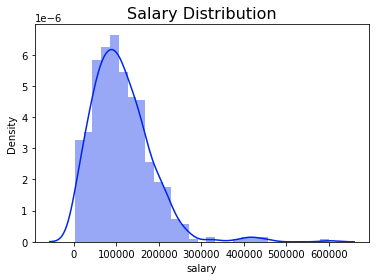

In [19]:
# Salary distribution
sns.set_palette('winter')
ax = sns.distplot(df['salary'])
ax.set_title('Salary Distribution', fontdict={'fontsize': 16})

Few people earn over \$300,000

---

### Salary VS experience level

In [20]:
# mean salary of employees with different experience levels
mean_s_exp_lv = df.groupby('experience_level')['salary'].mean().sort_values()
mean_s_exp_lv

experience_level
Entry         61643.318182
Mid           87996.056338
Senior       138617.292857
Executive    199392.038462
Name: salary, dtype: float64

In [21]:
sns.set_style('whitegrid')

Text(0.5, 1.0, 'Experience Level VS Salary')

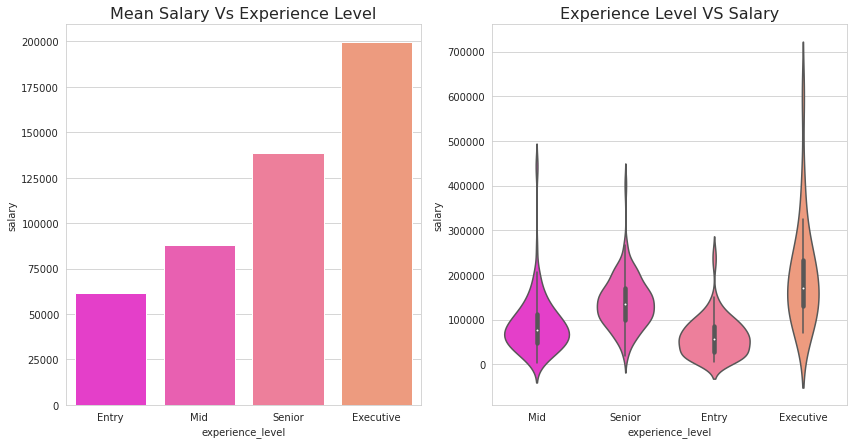

In [22]:
plt.figure(figsize=(14, 7))
sns.set_palette('spring')

plt.subplot(1, 2, 1)
ax = sns.barplot(x=mean_s_exp_lv.index, y=mean_s_exp_lv)
ax.set_title('Mean Salary Vs Experience Level', fontdict={'fontsize': 16})

plt.subplot(1, 2, 2)
ax = sns.violinplot(data=df, x='experience_level', y='salary')
ax.set_title('Experience Level VS Salary', fontdict={'fontsize': 16})

**Experience Level VS Salary:**<br>
We see that data scientists with the experience level of **Executive** have the highest mean salary, about **\$200,000** annualy, and those with **Entry** level have the lowest mean salary, about **\$60,000**.

---

### Salary VS Employment Type

In [23]:
# mean salary of employees with different employment types
mean_s_emp_type = df.groupby('employment_type')['salary'].mean().sort_values()
mean_s_emp_type

employment_type
Part-time     33070.500000
Freelance     48000.000000
Full-time    113468.073129
Contract     184575.000000
Name: salary, dtype: float64

Text(0.5, 1.0, 'Employment Type VS Salary')

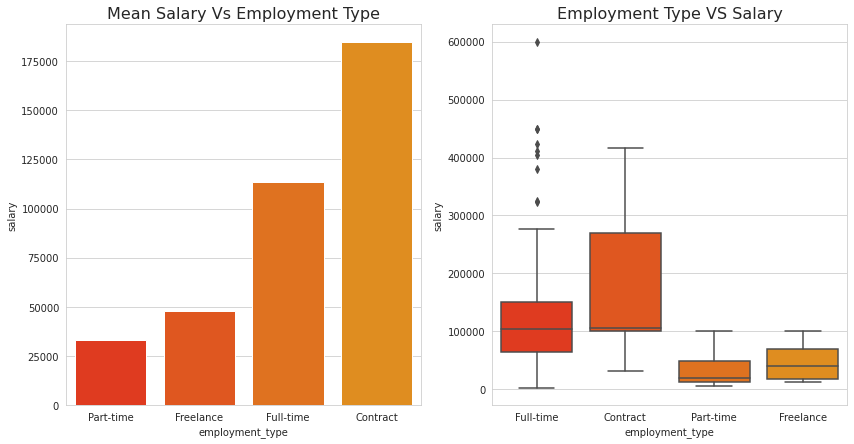

In [24]:
plt.figure(figsize=(14, 7))
sns.set_palette('autumn')

plt.subplot(1, 2, 1)
ax = sns.barplot(x=mean_s_emp_type.index, y=mean_s_emp_type)
ax.set_title('Mean Salary Vs Employment Type', fontdict={'fontsize': 16})

plt.subplot(1, 2, 2)
ax = sns.boxplot(data=df, x='employment_type', y='salary')
ax.set_title('Employment Type VS Salary', fontdict={'fontsize': 16})

**Employment Type VS Salary:**<br>
We see that data scientists with employment type of ***contract*** have the highest mean salary, about **\$180,000**, and those who work **part-time** have the lowest mean salary, about **\$30,000** annualy.

---

### Salary VS Company Size

In [25]:
# mean salary of employees from different company sizes
mean_s_cmp_size = df.groupby('company_size')['salary'].mean().sort_values()
mean_s_cmp_size

company_size
Small      77632.674699
Medium    116905.466258
Large     119242.994949
Name: salary, dtype: float64

Text(0.5, 1.0, 'Company Size VS Salary')

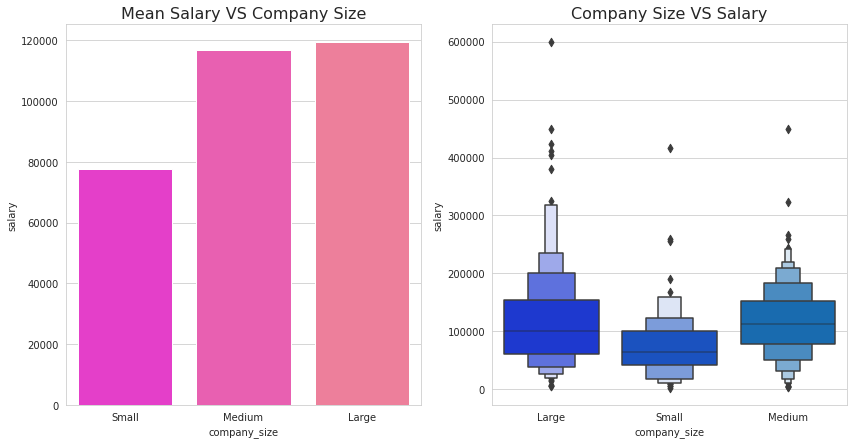

In [26]:
plt.figure(figsize=(14, 7))
sns.set_palette('spring')

plt.subplot(1, 2, 1)
ax = sns.barplot(x=mean_s_cmp_size.index, y=mean_s_cmp_size)
ax.set_title('Mean Salary VS Company Size', fontdict={'fontsize': 16})

plt.subplot(1, 2, 2)
sns.set_palette('winter')
ax = sns.boxenplot(data=df, x='company_size', y='salary')
ax.set_title('Company Size VS Salary', fontdict={'fontsize': 16})

**Company Size VS Salary:**<br>
We see that data scientists working at ***Large*** companies are paid the highest mean salary, about **\$120,000**, and those who work at **small** ones have the lowest mean salary, about **\$75,000** annualy.

----

### Salary VS Job type (remote, hybrid, onsite)

In [27]:
# mean salary of employees with different job types
mean_s_jtype = df.groupby('job_type')['salary'].mean().sort_values()
mean_s_jtype

job_type
hybrid     80823.030303
onsite    106354.622047
remote    122457.454068
Name: salary, dtype: float64

Text(0.5, 1.0, 'Job Type VS Salary')

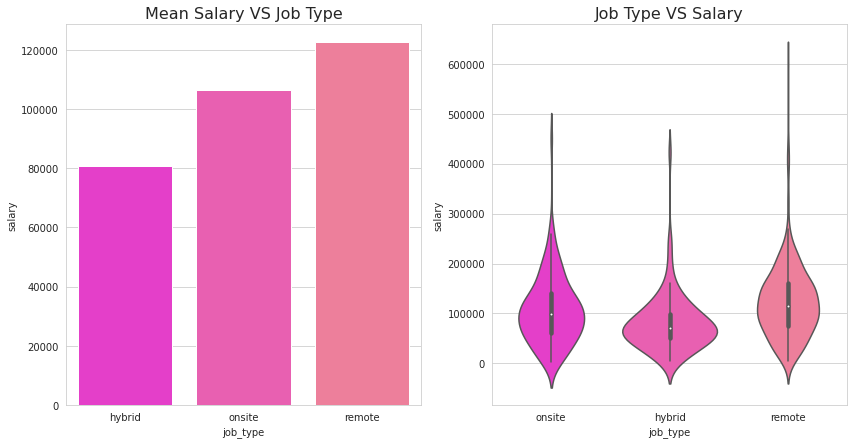

In [28]:
plt.figure(figsize=(14, 7))
sns.set_palette('spring')

plt.subplot(1, 2, 1)
ax = sns.barplot(x=mean_s_jtype.index, y=mean_s_jtype)
ax.set_title('Mean Salary VS Job Type', fontdict={'fontsize': 16})

plt.subplot(1, 2, 2)
ax = sns.violinplot(data=df, x='job_type', y='salary')
ax.set_title('Job Type VS Salary', fontdict={'fontsize': 16})

**Job Type (remote, on-site or hybrid) VS Salary:**<br>
We see that data scientists working ***remotely*** (about **\$120,000**) have a higher mean salary than those who work **on-site** (about **\$105,000**), and **hybrid** workers have a lower mean salary than former two (about **\$80,000**) annualy.

---

Text(0.5, 1.0, 'Job Type & Company Size VS Salary')

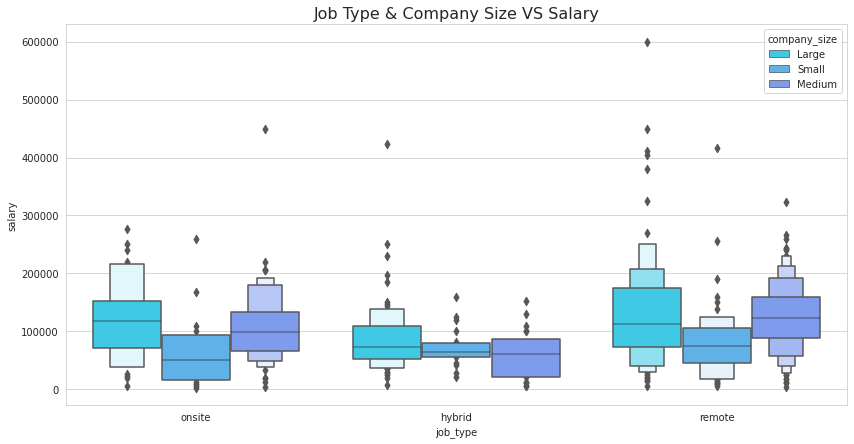

In [29]:
# job type and company size VS salary
plt.figure(figsize=(14, 7))
sns.set_palette('cool')
ax = sns.boxenplot(data=df, x='job_type', y='salary', hue='company_size')
ax.set_title('Job Type & Company Size VS Salary', fontdict={'fontsize': 16})

I would prefer to work **remotely** at a **large** company to get paid higher.

---

### Top 10 Data Science roles according to salary

In [30]:
top_ds_roles = df.groupby('job_title')['salary'].mean().sort_values(ascending=False)[:10]
top_ds_roles

job_title
Data Analytics Lead         405000.000000
Principal Data Engineer     328333.333333
Financial Data Analyst      275000.000000
Principal Data Scientist    215242.428571
Director of Data Science    195074.000000
Data Architect              177873.909091
Applied Data Scientist      175655.000000
Analytics Engineer          175000.000000
Data Specialist             165000.000000
Head of Data                160162.600000
Name: salary, dtype: float64

Text(0.5, 1.0, 'Top DS Roles According to Salary')

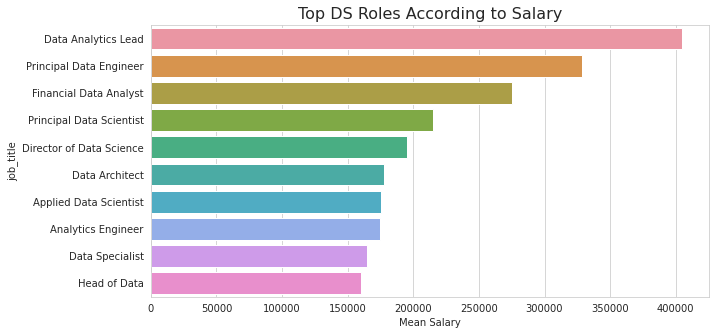

In [31]:
plt.figure(figsize=(10, 5))

ax = sns.barplot(y=top_ds_roles.index, x=top_ds_roles)
ax.set_xlabel('Mean Salary')
ax.set_title('Top DS Roles According to Salary', fontdict={'fontsize': 16})

***Data Analytics Lead***, ***Principal Data Engineer*** and ***Financial Data Analyst*** are the highest paid roles according to this dataset with mean annual salaries of **\$405,000**, **\$328,333** and **\$275,000** respectively.

---

### Top 10 campany-locations according to salary

In [32]:
top_cmp_locations = df.groupby('company_location')['salary'].mean().sort_values(ascending=False)[:10]
top_cmp_locations

company_location
RU    157500.000000
US    144055.261972
NZ    125000.000000
IL    119059.000000
JP    114127.333333
AU    108042.666667
AE    100000.000000
DZ    100000.000000
IQ    100000.000000
CA     99823.733333
Name: salary, dtype: float64

Text(0.5, 1.0, 'Top 10 company-locations according to Salary')

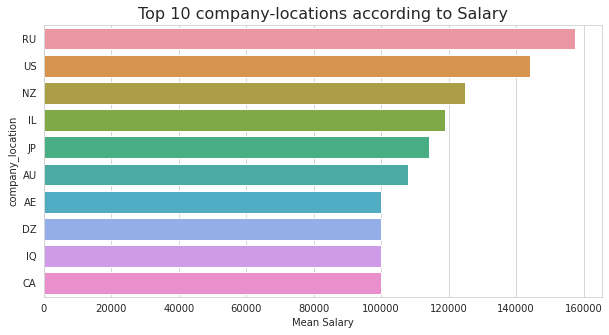

In [33]:
plt.figure(figsize=(10, 5))

ax = sns.barplot(y=top_cmp_locations.index, x=top_cmp_locations)
ax.set_xlabel('Mean Salary')
ax.set_title('Top 10 company-locations according to Salary', fontdict={'fontsize': 16})

***RU (Russia)***, ***US (the United States)*** and ***NZ (New Zealand)*** are the highest paying countries for data science roles according to this dataset, paying mean annual salaries of **\$157,500**, **\$144,055** and **\$125,000** respectively.

---

### Top 10 Employee-residence according to salary

In [34]:
top_emp_residence = df.groupby('employee_residence')['salary'].mean().sort_values(ascending=False)[:10]
top_emp_residence

employee_residence
MY    200000.000000
PR    160000.000000
US    149194.117470
NZ    125000.000000
CH    122346.000000
AU    108042.666667
RU    105750.000000
SG    104176.500000
JP    103537.714286
AE    100000.000000
Name: salary, dtype: float64

Text(0.5, 1.0, 'Top 10 employee-residence according to Salary')

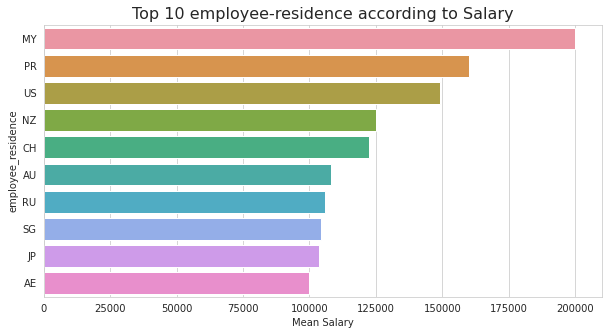

In [35]:
plt.figure(figsize=(10, 5))

ax = sns.barplot(y=top_emp_residence.index, x=top_emp_residence)
ax.set_xlabel('Mean Salary')
ax.set_title('Top 10 employee-residence according to Salary', fontdict={'fontsize': 16})

***MY (Malaysia)***, ***PR (Puerto Rico)*** and ***US (the United States)*** are the highest paid employee-residences (countries where employees live) in data science roles according to this dataset, being paid mean annual salaries of **\$200,000**, **\$160,000** and **\$149,194** respectively.

---

### Company Size VS Job Types Counts

Text(0.5, 1.0, 'Company Size VS Job Types Counts')

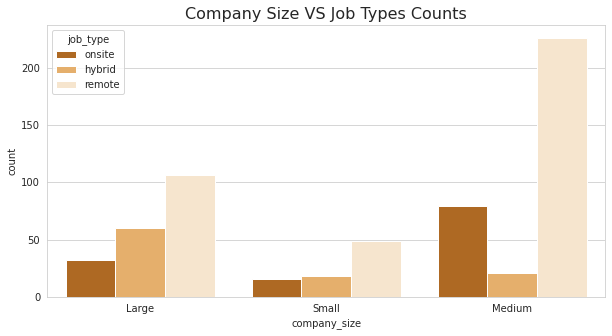

In [36]:
plt.figure(figsize=(10, 5))
sns.set_palette('PuOr')
ax = sns.countplot(data=df, x='company_size', hue='job_type')
ax.set_title('Company Size VS Job Types Counts', fontdict={'fontsize': 16})

In all companies, the number of **remote** workers is **higher** than that of **hybrid** and **on-site**. Furthermore, the number of **hybrid** workers in **small** and **large** companies is **higher** than that of **on-site**, whereas in **medium-sized** companies, **more** people work **on-site** than **hybrid**.

***

<div style='border: 2px solid blue; padding: 20px;text-align: center'>
    <p style='margin: 0 auto; width: 80%'>If you found the kernel helpful or appreciable, an upvote will definitely motivate me to keep on. Also, providing that you really want to do me a favor, share your feedbacks and ideas on improving the kernel. You can also see all my other works <a href='https://www.kaggle.com/hikmatullahmohammadi/code'>here</a>
    </p>
    <img src='https://raw.githubusercontent.com/hikmatullah-mohammadi/ds-job-salaries-analysis-eda/master/thank-you.jpg' alt='Thank you'/>
</div>